In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Carico il dataset

In [28]:
df = pd.read_csv("./MobilePrice/train.csv")
df.shape

(2000, 21)

In [29]:
#Print the number of instances
print("Number of instances: ", len(df))
#Print if there are any missing values
print("Missing values: ", df.isnull().values.any())
#Print the number of missing values
print("Number of missing values: ", df.isnull().sum().sum())
#Prinf if the dataset is balanced with respect to the target variable
print("Balanced dataset:\n", df['price_range'].value_counts())

Number of instances:  2000
Missing values:  False
Number of missing values:  0
Balanced dataset:
 1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


In [30]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [31]:
#The sc_w variable assumes discrete values or continuous values?
df['sc_w'].value_counts()

1     210
3     199
4     182
0     180
5     161
2     156
7     132
6     130
8     125
10    107
9      97
11     84
12     68
13     49
14     33
15     31
16     29
17     19
18      8
Name: sc_w, dtype: int64

In [32]:
media_lowEnd= df.loc[df['price_range']==1, 'sc_w'].mean()
media_highEnd= df.loc[df['price_range']==3, 'sc_w'].mean()

In [33]:
#Print if the mean of the sc_w variable is different for the low-end and high-end devices
print("Mean of sc_w for low-end devices: ", media_lowEnd)
print("Mean of sc_w for high-end devices: ", media_highEnd)

Mean of sc_w for low-end devices:  5.544
Mean of sc_w for high-end devices:  6.128


In [34]:
df=df.loc[df['sc_w']!=0]

In [35]:
media_lowEnd= df.loc[df['price_range']==1, 'sc_w'].mean()
media_highEnd= df.loc[df['price_range']==3, 'sc_w'].mean()
print("Mean of sc_w for low-end devices: ", media_lowEnd)
print("Mean of sc_w for high-end devices: ", media_highEnd)

Mean of sc_w for low-end devices:  6.132743362831858
Mean of sc_w for high-end devices:  6.646420824295011


(array([ 55.,  77.,  79., 117., 133.]),
 array([ 503. ,  800.8, 1098.6, 1396.4, 1694.2, 1992. ]),
 <BarContainer object of 5 artists>)

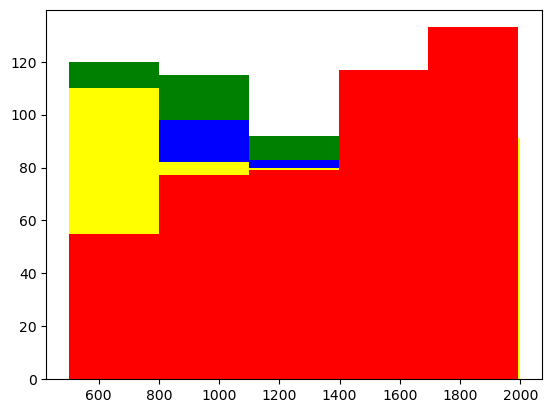

In [36]:
plt.hist(df.loc[df['price_range']==0, 'battery_power'], bins=5, color= 'green')
plt.hist(df.loc[df['price_range']==1, 'battery_power'], bins=5, color='blue')
plt.hist(df.loc[df['price_range']==2, 'battery_power'], bins=5, color='yellow')
plt.hist(df.loc[df['price_range']==3, 'battery_power'], bins=5, color='red')

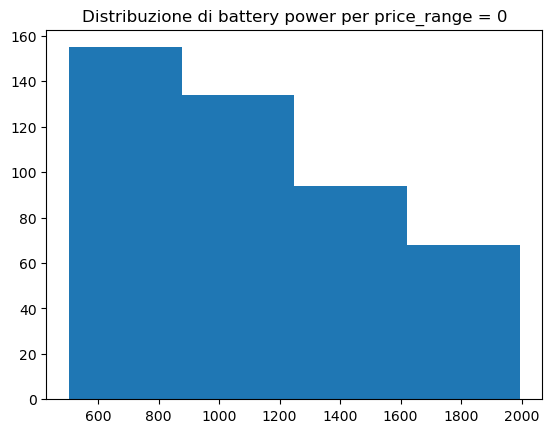

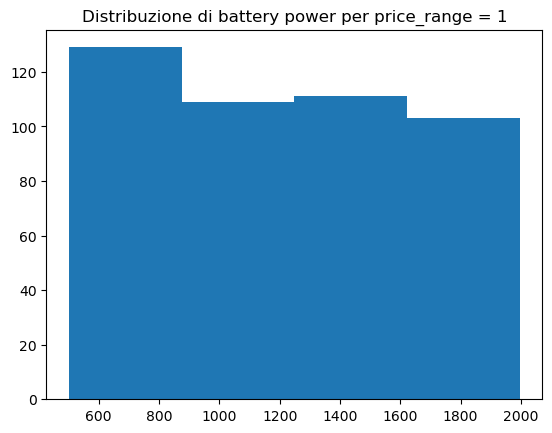

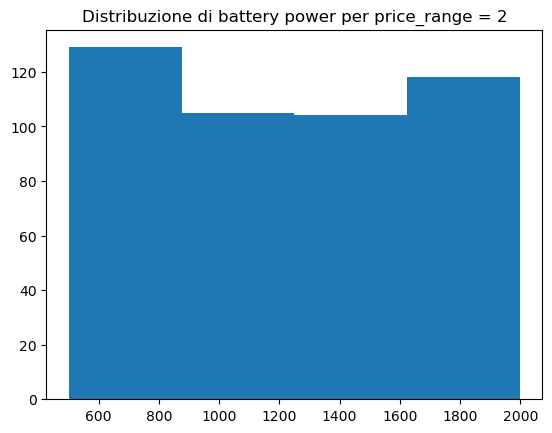

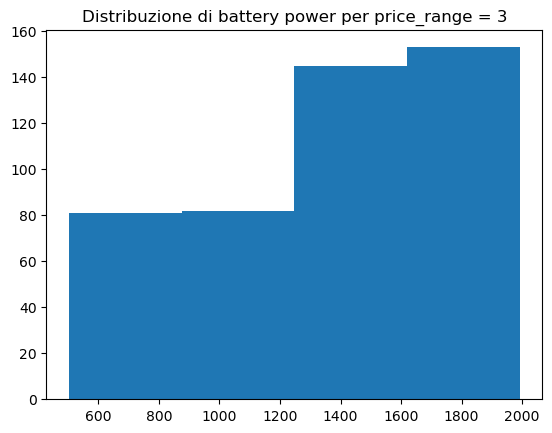

In [37]:
for i in range(4):
    data = df[df['price_range'] == i]['battery_power']
    plt.hist(data, bins=4)
    plt.title(f'Distribuzione di battery power per price_range = {i}')
    plt.show()

In [38]:
df4g=df[df['four_g']==1]
df3g=df[df['three_g']==1]
if df4g.equals(df3g):
    print("sono uguali")

In [39]:
ddf = df4g.loc[(df4g['blue'] == 0) & (df4g['wifi'] == 0)]
count = ddf.shape[0]
print("Numero di telefoni 4G senza wifi e bluetooth:", count)

Numero di telefoni 4G senza wifi e bluetooth: 233


------------------------------------------------------------PARTE 2---------------------------------------------------------------------------------------------------------

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv("./MobilePrice/train.csv")


In [41]:
data_text=df.drop(['price_range'], axis=1)
data_label=df['price_range']
#Normalize and split test_train
scaler = StandardScaler()
data_text = scaler.fit_transform(data_text)
X_train, X_test, y_train, y_test = train_test_split(data_text, data_label, test_size=1/4, random_state=42)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_train_pred_tree = decision_tree.predict(X_train)
y_pred_tree = decision_tree.predict(X_test)
#Logistic Regression
logistic_regression = LogisticRegression(solver='saga')
logistic_regression.fit(X_train, y_train)
y_train_pred_losgistic = logistic_regression.predict(X_train)
y_pred_losgistic = logistic_regression.predict(X_test)


In [43]:
print("Accuracy of the model on the training set: (Tree)", accuracy_score(y_train, y_train_pred_tree))
print("Accuracy of the model on the test set: (Tree)", accuracy_score(y_test, y_pred_tree))
print("Accuracy of the model on the training set: (Logistic)", accuracy_score(y_train, y_train_pred_losgistic))
print("Accuracy of the model on the test set: (Logistic)", accuracy_score(y_test, y_pred_losgistic))



Accuracy of the model on the training set: (Tree) 1.0
Accuracy of the model on the test set: (Tree) 0.806
Accuracy of the model on the training set: (Logistic) 0.9766666666666667
Accuracy of the model on the test set: (Logistic) 0.962


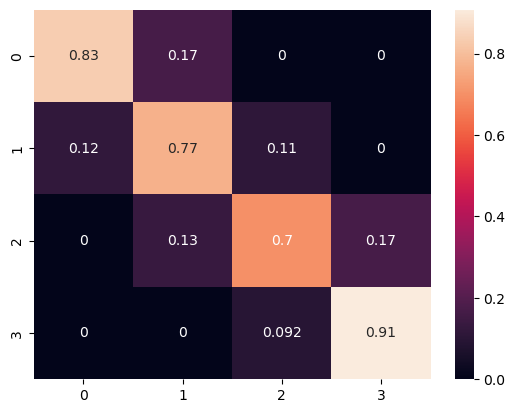

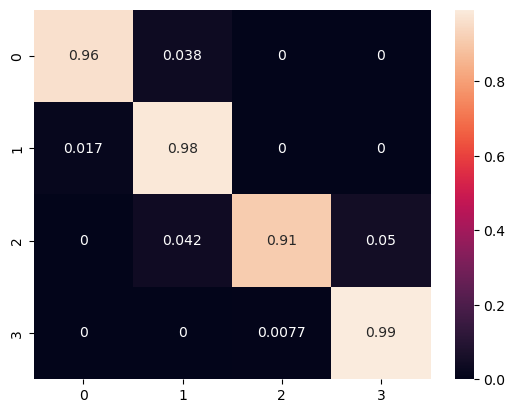

In [44]:
#Print the normalized confusion matrix with seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_tree_norm = cm_tree.astype('float') / cm_tree.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_tree_norm, annot=True)
plt.show()
#Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_losgistic)
cm_logistic_norm = cm_logistic.astype('float') / cm_logistic.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_logistic_norm, annot=True)
plt.show()


In [45]:
#cross validation
from sklearn.model_selection import cross_val_score

#Decision Tree
scores_tree = cross_val_score(decision_tree, data_text, data_label, cv=10)
print("Mean of cross validation scores (Tree): ", scores_tree.mean())
#Logistic Regression
scores_logistic = cross_val_score(logistic_regression, data_text, data_label, cv=10)
print("Mean of cross validation scores (Logistic): ", scores_logistic.mean())

Mean of cross validation scores (Tree):  0.8325000000000001
Mean of cross validation scores (Logistic):  0.9620000000000001


In [46]:
from sklearn.model_selection import GridSearchCV

parameters_tree = {'criterion': ['gini', 'entropy'], 'max_features' : ['auto', 'sqrt', 'log2'], 'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search_tree = GridSearchCV(decision_tree, parameters_tree, cv=10)
grid_search_tree.fit(data_text, data_label)
print("Best parameters (Tree): ", grid_search_tree.best_params_)
print("Best score (Tree): ", grid_search_tree.best_score_)


Best parameters (Tree):  {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 6}
Best score (Tree):  0.6835


In [47]:
#MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

df = pd.read_csv("./MobilePrice/train.csv")

data_text=df.drop(['price_range'], axis=1)
data_label=df['price_range']

max_abs_scaler = MaxAbsScaler()
max_abs_scaler.fit(data_text)
df_max_abs = max_abs_scaler.transform(data_text)
df_max_abs = pd.DataFrame(df_max_abs, columns=data_text.columns)

results = cross_val_score(decision_tree, data_text, data_label, cv=10)
print("Accuracy: %.2f%%" % (results.mean()*100.0))

Accuracy: 83.15%


In [48]:
#Discretizer Ram
from sklearn.preprocessing import KBinsDiscretizer
df = pd.read_csv("./MobilePrice/train.csv")
data_text=df.drop(['price_range'], axis=1)
data_label=df['price_range']
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
est.fit(data_text['ram'].values.reshape(-1, 1))
Xt = est.transform(data_text['ram'].values.reshape(-1, 1))
data_text['ram'] = Xt


In [49]:
cross_val_score(decision_tree, data_text, data_label, cv=10)
print("Accuracy: %.2f%%" % (results.mean()*100.0))

Accuracy: 83.15%


In [55]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
df = pd.read_csv("./MobilePrice/train.csv")
data_text=df.drop(['price_range'], axis=1)
data_label=df['price_range']
#pipeline with discretizer on ram and battery power

pipe = Pipeline(steps=[('minmaxscaler', MinMaxScaler(feature_range=(0, 1))), ('Normalizer', Normalizer())])
preprocessor = ColumnTransformer(transformers=[('ram_discretizer', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'), ['ram']), 
                                               ('battery_discretizer', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'), ['battery_power'])], remainder=pipe)

clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', decision_tree)])
clf.fit(data_text, data_label)
y_pred=clf.predict(data_text)
print("Accuracy: %.2f%%" % (accuracy_score(data_label, y_pred)*100.0))

Accuracy: 100.00%
